#Etude de la fréquentation des lignes Paris-Bordeaux


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
parisbordeaux = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/parisbordeaux.csv')

In [3]:
#tri des données de circulation par période
parisbordeaux = parisbordeaux.sort_values(['Période'])
parisbordeaux['Nombre de circulations effectives'] = (parisbordeaux['Nombre de circulations prévues'])-(parisbordeaux['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
parisbordeaux['Service'] = parisbordeaux['Service'].replace(np.nan,'LGV') #Remplacement des valeurs NaN par la valeur LGV
parisbordeaux

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
2,2015,1.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,208.685668,615.0,1.0,19.0,17.684211,0.693811,58.0,37.655172,4.705212,2015-01,614.0
3,2015,2.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,210.177083,577.0,1.0,22.0,19.772727,0.949653,44.0,30.772727,4.307292,2015-02,576.0
8,2015,3.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,207.714729,645.0,0.0,8.0,21.375000,0.337984,27.0,32.740741,2.040310,2015-03,645.0
20,2015,4.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,207.685127,632.0,0.0,15.0,13.066667,0.458861,42.0,35.761905,3.128165,2015-04,632.0
1,2015,5.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,211.077044,637.0,1.0,10.0,18.100000,0.413522,34.0,43.676471,2.451258,2015-05,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020,2.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,147.564789,716.0,6.0,562.0,2.628410,1.973075,56.0,21.617262,2.226667,2020-02,710.0
61,2020,3.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,146.943946,501.0,55.0,348.0,2.989368,2.204596,77.0,24.003247,5.401457,2020-03,446.0
59,2020,4.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,153.891892,92.0,55.0,35.0,7.185238,6.765766,20.0,22.676667,15.250000,2020-04,37.0
64,2020,5.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,145.522222,325.0,55.0,220.0,2.131212,1.648704,36.0,26.245833,4.363333,2020-05,270.0


Text(25, 100, 'Mise en service de la ligne LGV')

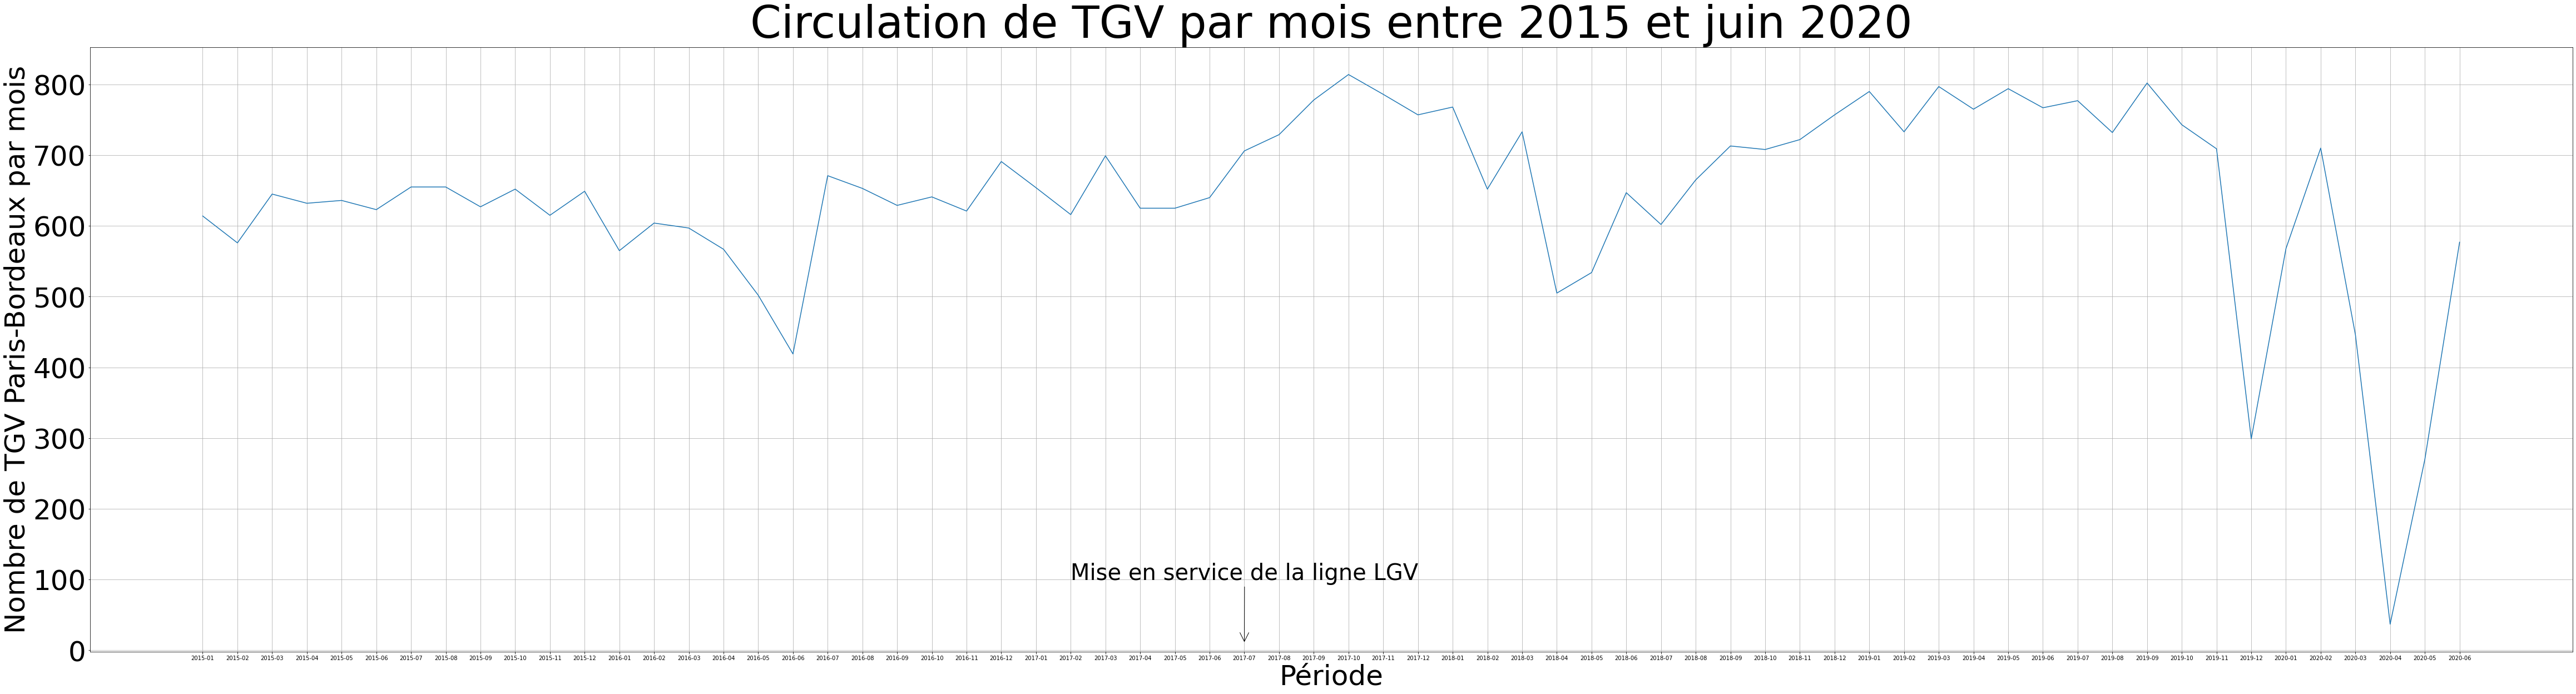

In [4]:
plt.figure(figsize=(80,20))
plt.plot(parisbordeaux['Période'],parisbordeaux['Nombre de circulations effectives'])
plt.title('Circulation de TGV par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV Paris-Bordeaux par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),
xytext=(25,100),
arrowprops=dict(facecolor='black',
arrowstyle='->'), size=40)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<BarContainer object of 2 artists>

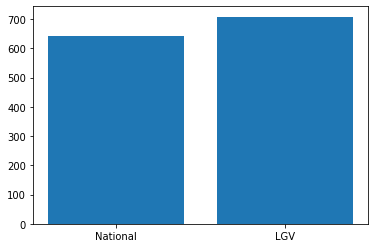

In [5]:
moyenne_circulation_service = [parisbordeaux[parisbordeaux['Service']=='National']['Nombre de circulations effectives'].mean(),parisbordeaux[parisbordeaux['Service']=='LGV'][parisbordeaux['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service)

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 65.

<Figure size 432x288 with 0 Axes>

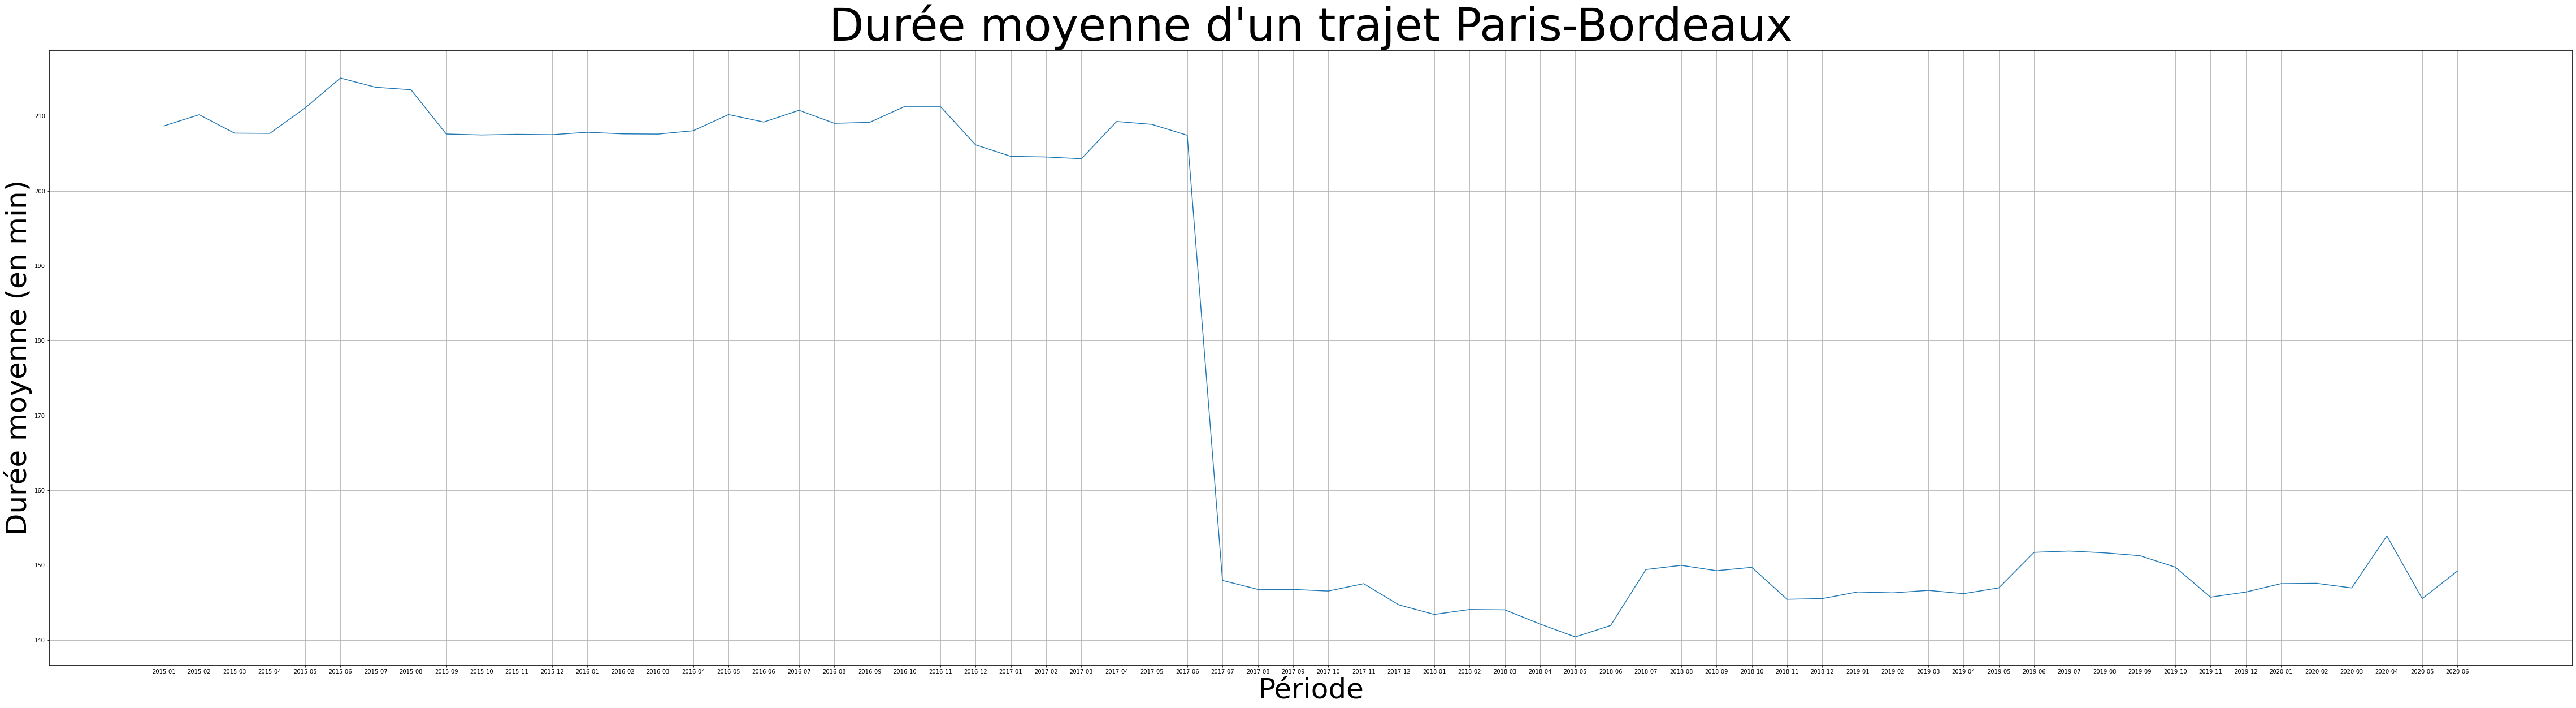

In [6]:
plt.clf()
plt.figure(figsize=(80,20))
plt.plot(parisbordeaux['Période'],parisbordeaux['Durée moyenne du trajet (min)'])
plt.title("Durée moyenne d'un trajet Paris-Bordeaux",size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Durée moyenne (en min)', size = 50)
plt.grid() 



In [7]:
#J'ai essayé, sans succès, de faire une fonction pour ne pas avoir  à refaire ce protocole
bordeauxparis = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/bordeauxparis.csv')
bordeauxparis = bordeauxparis.sort_values(['Période'])
bordeauxparis['Nombre de circulations effectives'] = (bordeauxparis['Nombre de circulations prévues'])-(bordeauxparis['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
bordeauxparis['Service'] = bordeauxparis['Service'].replace(np.nan,'LGV') #Remplacement des valeurs NaN par la valeur LGV
bordeauxparis

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
45,2015,1.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,210.638462,653.0,3.0,62.0,25.016129,2.969231,63.0,60.396825,5.683077,2015-01,650.0
36,2015,2.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,211.197411,619.0,1.0,53.0,19.981132,2.370550,53.0,42.169811,3.745955,2015-02,618.0
41,2015,3.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,209.769795,682.0,0.0,70.0,13.914286,1.966276,44.0,40.113636,3.431085,2015-03,682.0
31,2015,4.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,209.726172,663.0,2.0,103.0,17.796117,3.537065,47.0,41.914894,3.670197,2015-04,661.0
44,2015,5.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,211.434389,663.0,0.0,121.0,14.140496,3.285068,39.0,38.358974,1.941176,2015-05,663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,2.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,145.998682,765.0,6.0,326.0,7.165440,2.792885,78.0,30.495513,2.751274,2020-02,759.0
59,2020,3.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,142.476596,519.0,49.0,192.0,6.777344,2.544468,81.0,28.860082,6.171206,2020-03,470.0
61,2020,4.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,152.107143,107.0,51.0,31.0,2.134409,0.960119,42.0,18.363889,17.791071,2020-04,56.0
64,2020,5.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,143.230159,301.0,49.0,111.0,4.492342,1.763492,28.0,33.616667,1.776257,2020-05,252.0


Text(25, 100, 'Mise en service de la ligne LGV')

<Figure size 432x288 with 0 Axes>

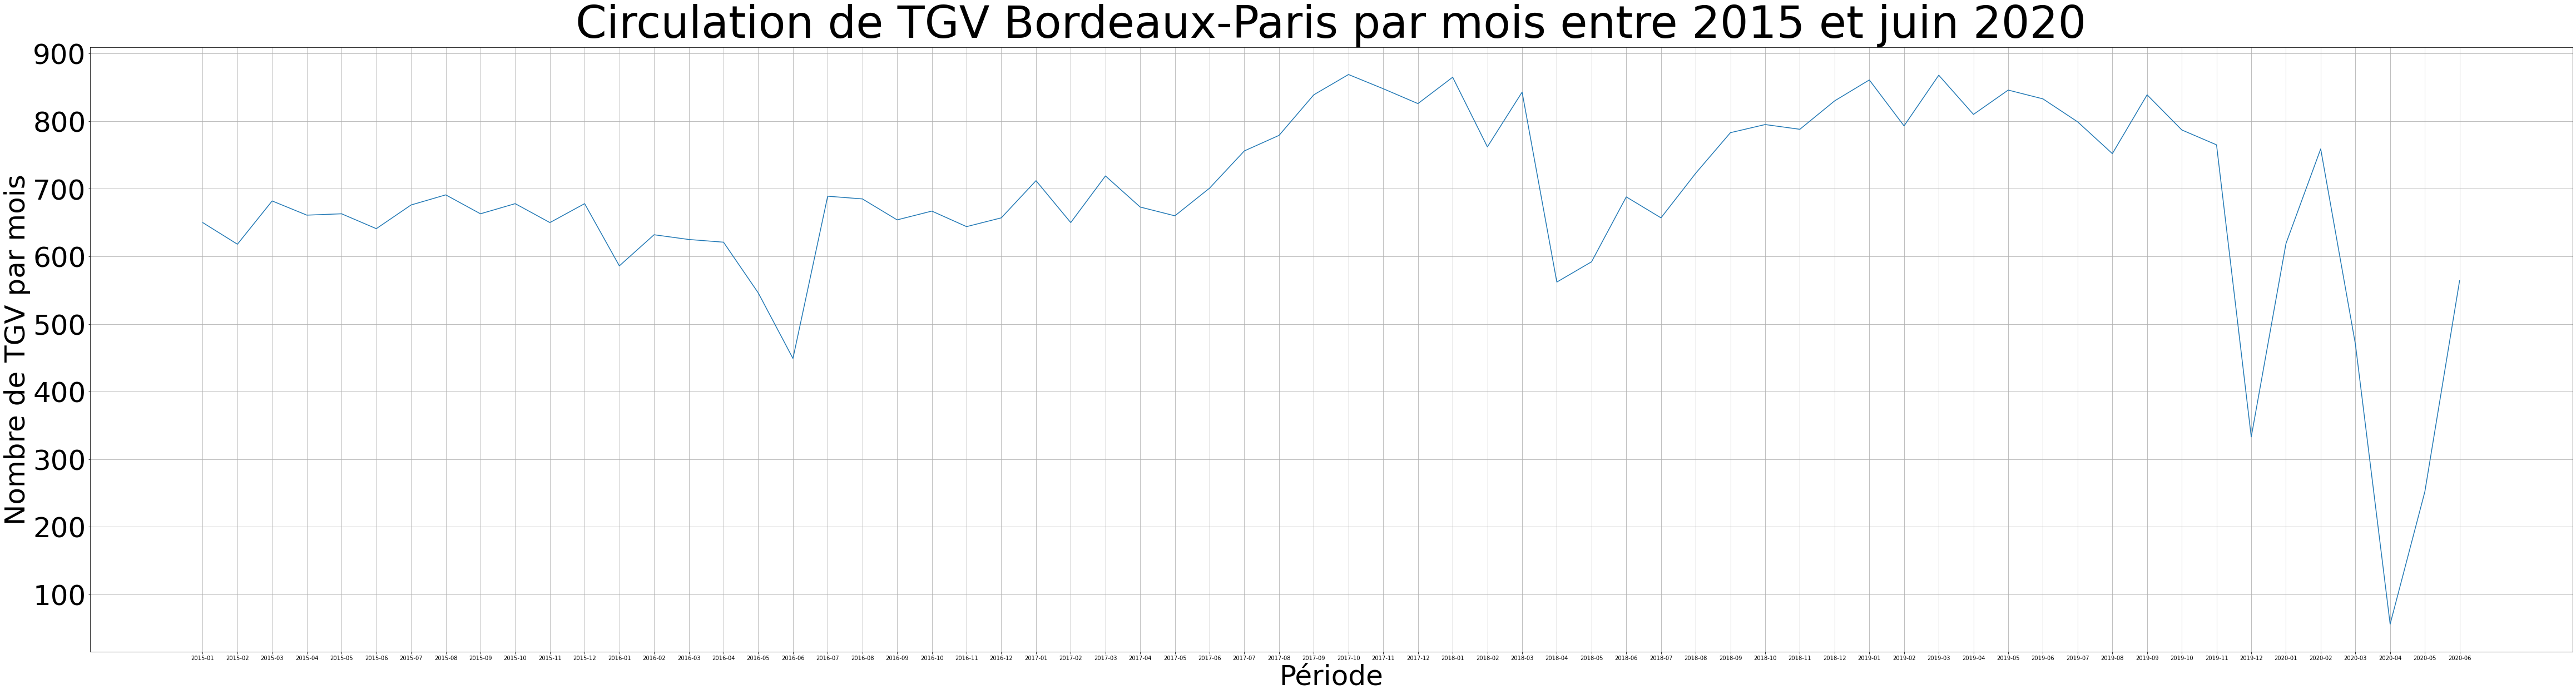

In [8]:
plt.clf() 
 
plt.figure(figsize=(80,20))
plt.plot(bordeauxparis['Période'],bordeauxparis['Nombre de circulations effectives'])
plt.title('Circulation de TGV Bordeaux-Paris par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),xytext=(25,100),arrowprops=dict(facecolor='black',arrowstyle='->'), size=40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[678.8333333333334, 772.5]

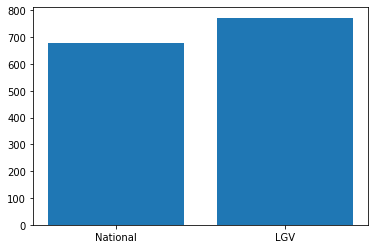

In [9]:
moyenne_circulation_service_bordeauxparis = [bordeauxparis[bordeauxparis['Service']=='National']['Nombre de circulations effectives'].mean(),bordeauxparis[bordeauxparis['Service']=='LGV'][bordeauxparis['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service_bordeauxparis)
moyenne_circulation_service_bordeauxparis

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 94.

<Figure size 432x288 with 0 Axes>

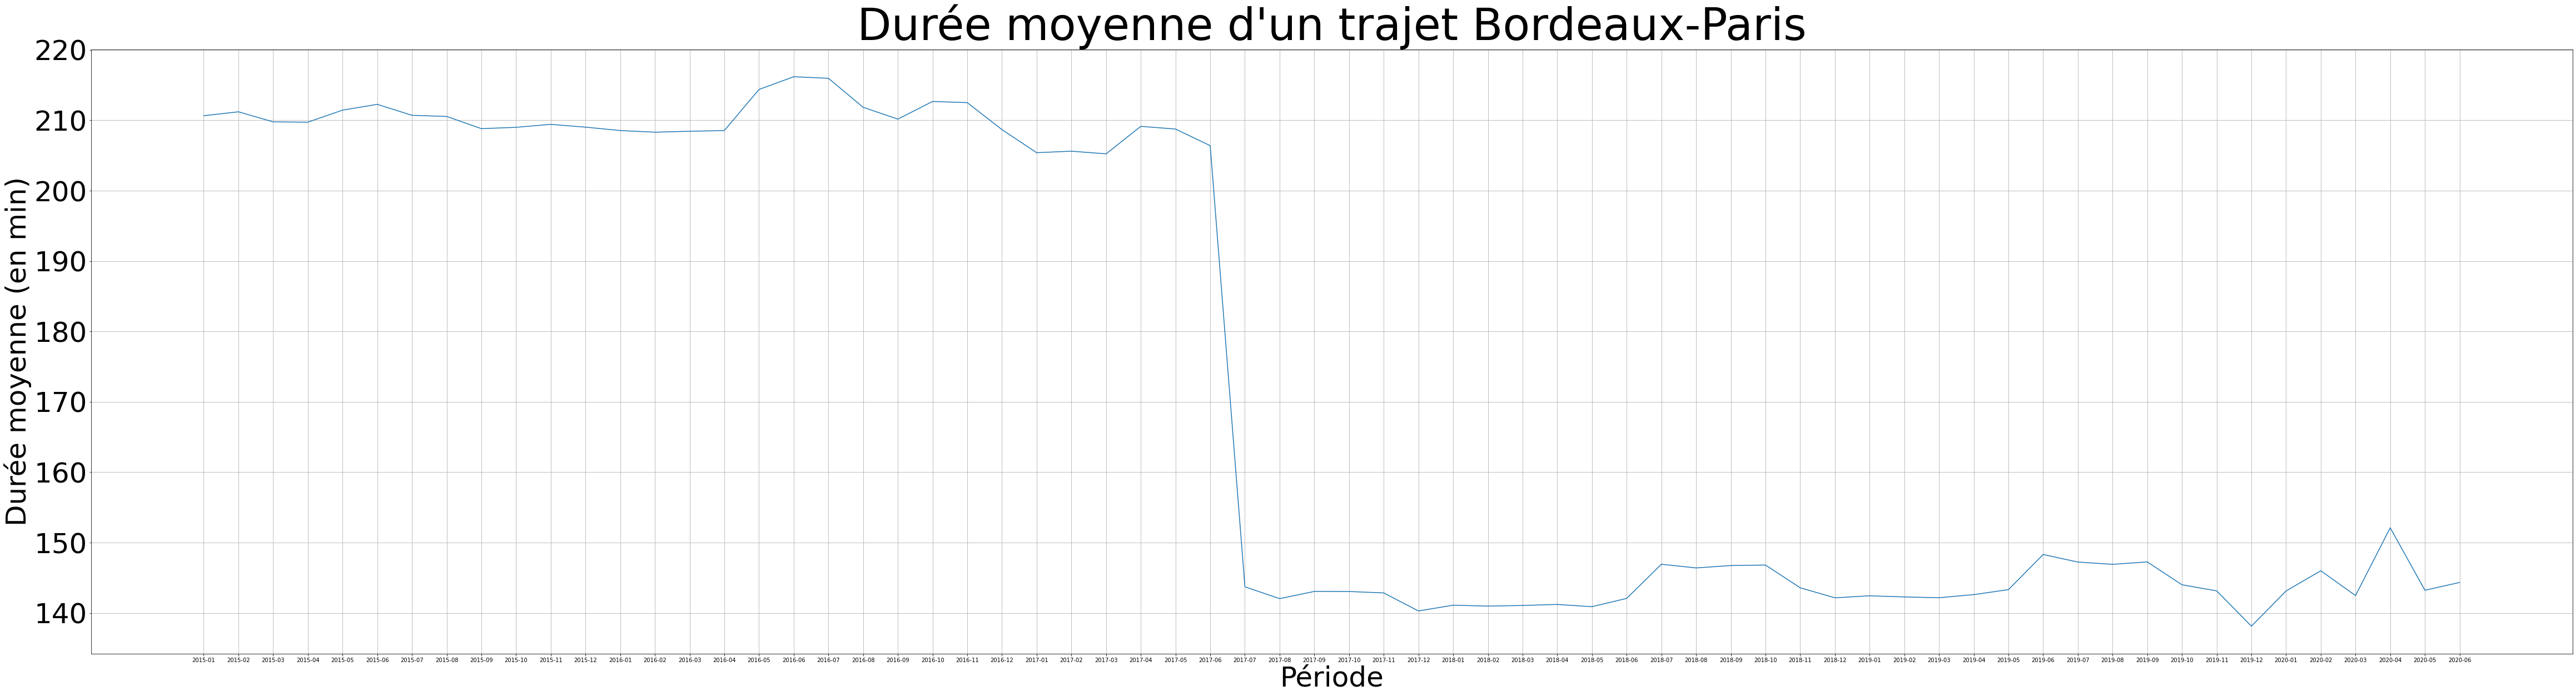

In [10]:
plt.clf()
plt.figure(figsize=(80,20))
plt.plot(bordeauxparis['Période'],bordeauxparis['Durée moyenne du trajet (min)'])
plt.title("Durée moyenne d'un trajet Bordeaux-Paris",size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Durée moyenne (en min)', size = 50)
plt.yticks(size = 50)
plt.grid() 

In [11]:
frequentation_paris_bordeaux=pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/frequentation-paris-bordeaux.csv', sep=';')
frequentation_paris_bordeaux = frequentation_paris_bordeaux.sort_index(axis=1 ,ascending=True)
frequentation_paris_bordeaux

,Nom de la gare,Total Voyageurs 2015,Total Voyageurs 2016,Total Voyageurs 2017,Total Voyageurs 2018,Total Voyageurs 2019
0,Bordeaux Saint-Jean,12062338,12198403,14979299,16080989,17675655
1,Paris Montparnasse,55167519,55162747,57752741,59174531,61374035


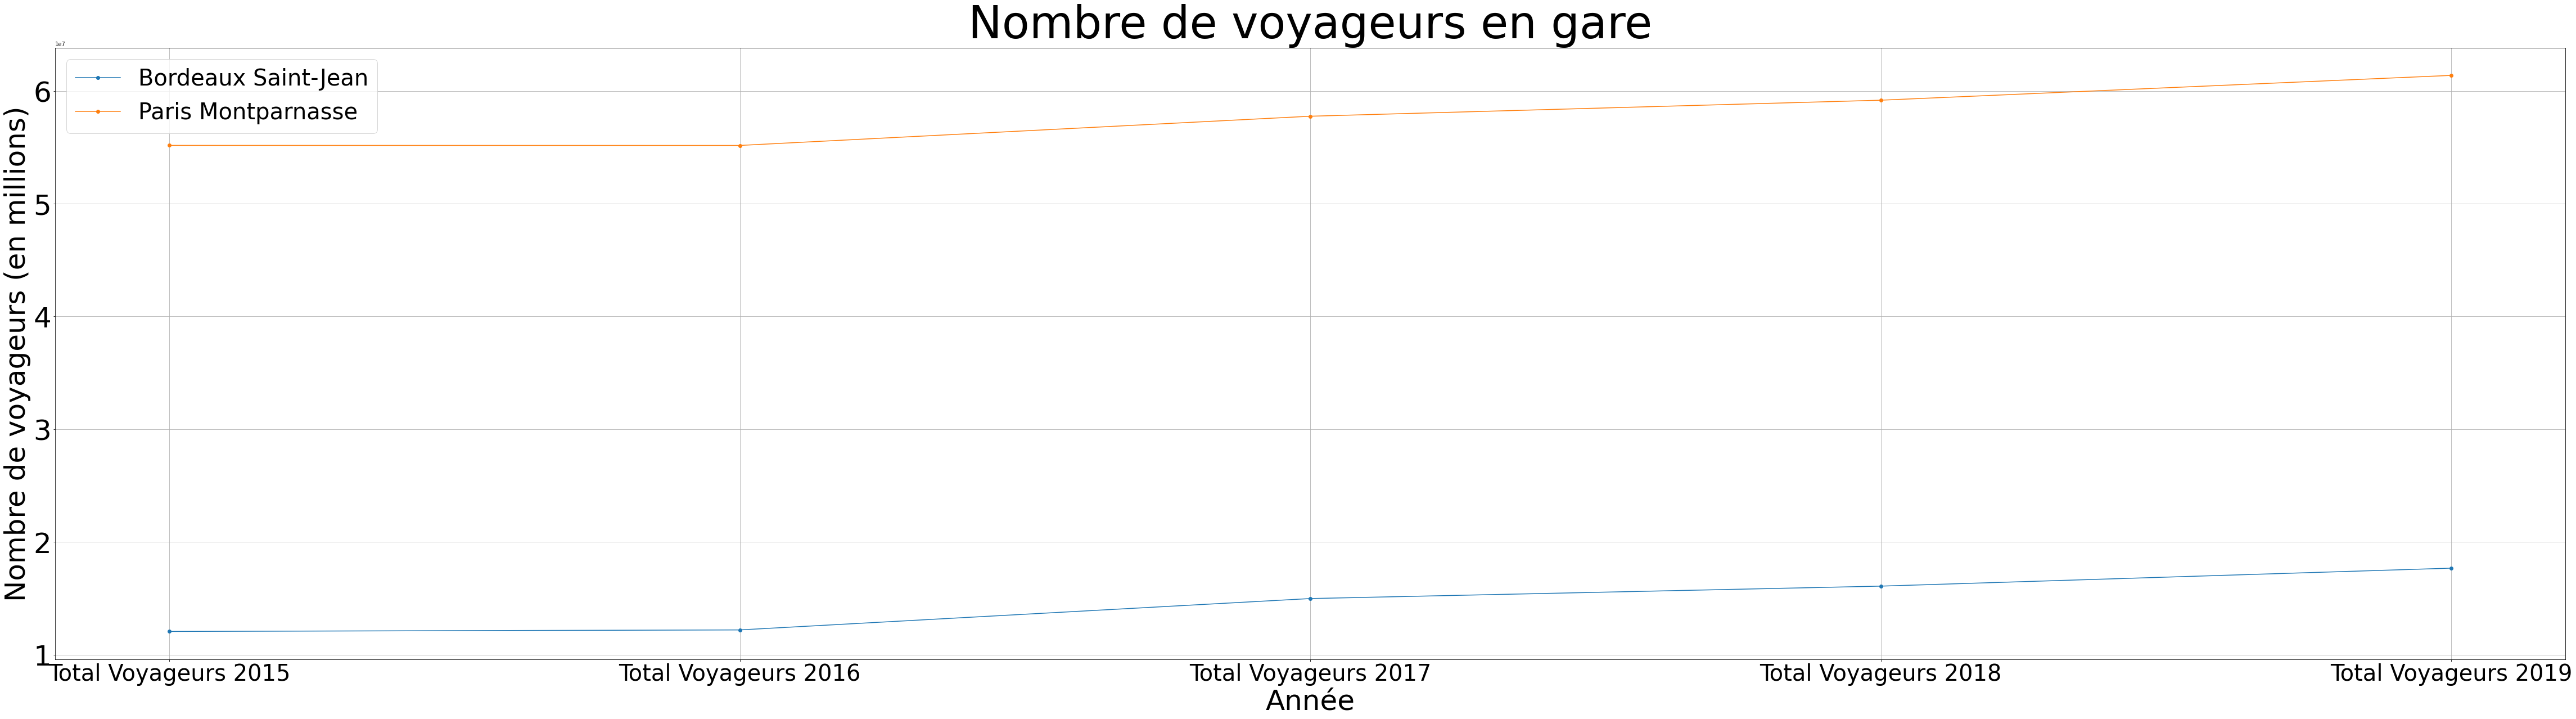

In [12]:
voyageursbordeaux=frequentation_paris_bordeaux.iloc[0,1:6]
voyageursparis=frequentation_paris_bordeaux.iloc[1,1:6]

plt.clf
plt.figure(figsize=(80,20))
plt.plot(voyageursbordeaux,marker='o', label="Bordeaux Saint-Jean")
plt.plot(voyageursparis,marker='o', label="Paris Montparnasse")
plt.title("Nombre de voyageurs en gare",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Nombre de voyageurs (en millions)', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid() 
plt.legend(loc='best', fontsize=40)

In [13]:
#Effet cumulatif depuis 2015
for i in range(5,10):
  frequentation_paris_bordeaux['Différence 201{}-2015'.format(i)]=frequentation_paris_bordeaux['Total Voyageurs 201{}'.format(i)]-frequentation_paris_bordeaux['Total Voyageurs 2015']
frequentation_paris_bordeaux

,Nom de la gare,Total Voyageurs 2015,Total Voyageurs 2016,Total Voyageurs 2017,Total Voyageurs 2018,Total Voyageurs 2019,Différence 2015-2015,Différence 2016-2015,Différence 2017-2015,Différence 2018-2015,Différence 2019-2015
0,Bordeaux Saint-Jean,12062338,12198403,14979299,16080989,17675655,0,136065,2916961,4018651,5613317
1,Paris Montparnasse,55167519,55162747,57752741,59174531,61374035,0,-4772,2585222,4007012,6206516


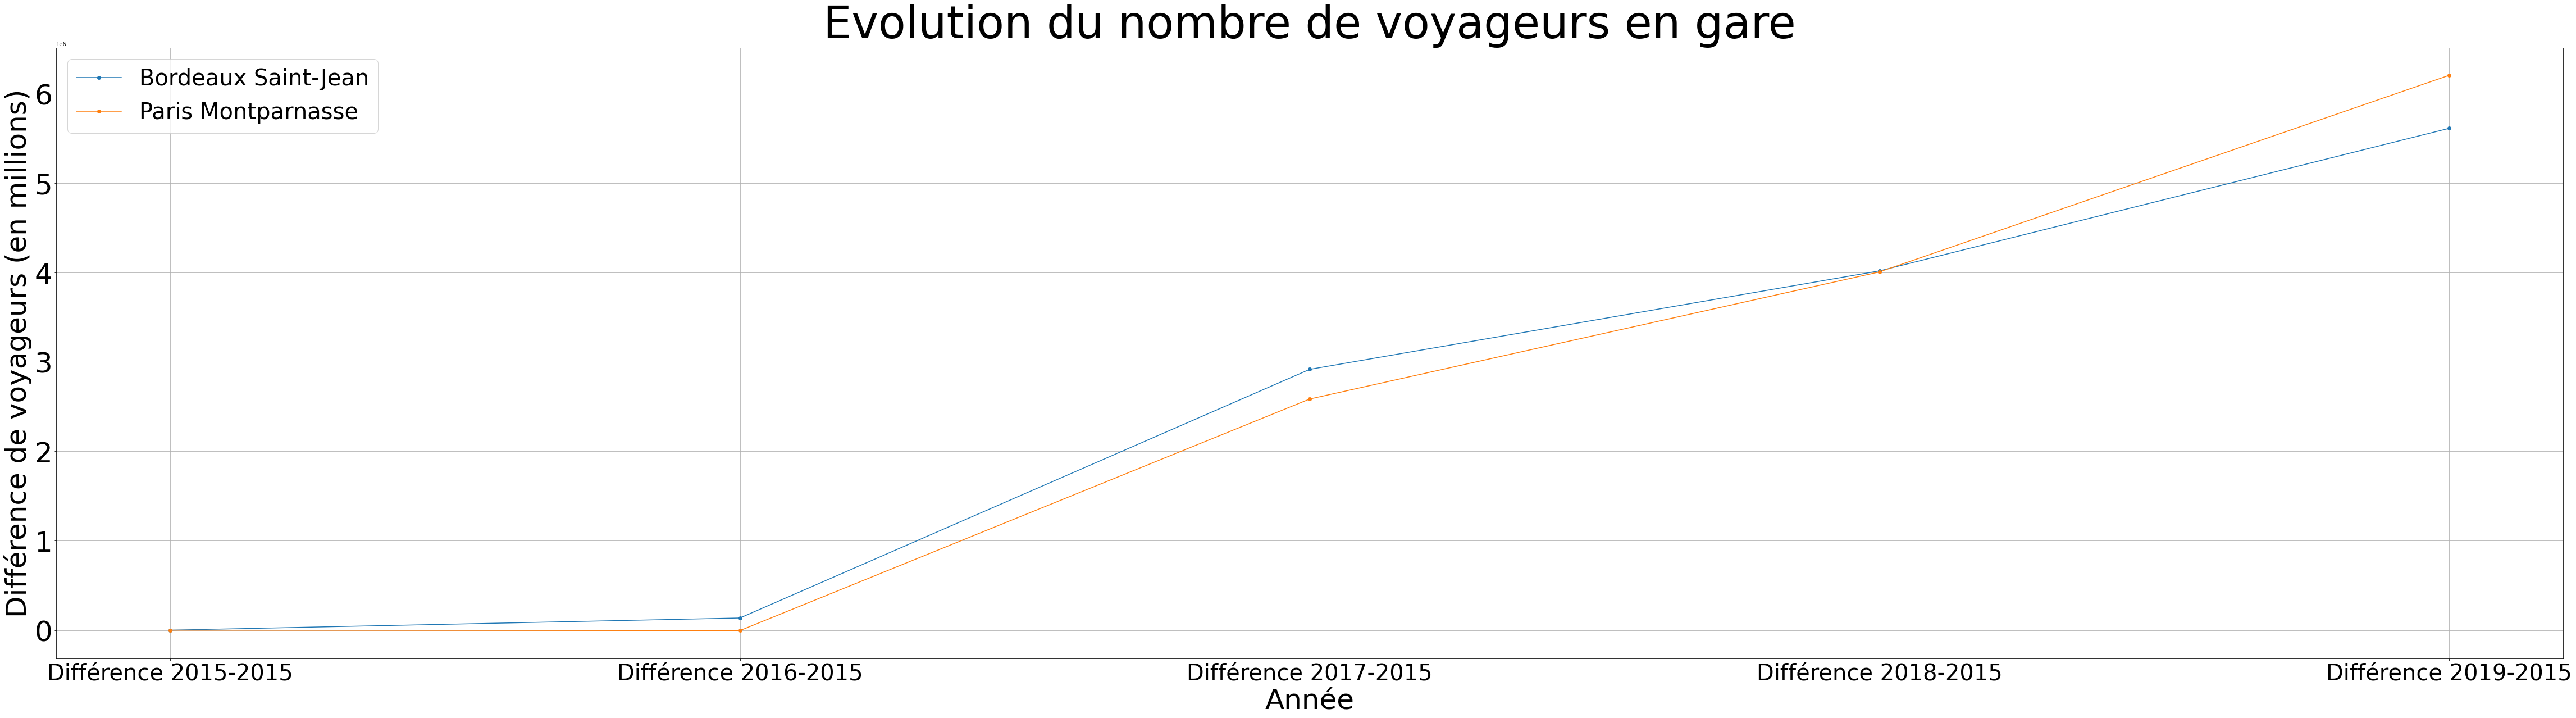

In [14]:
voyageursbordeaux_cum=frequentation_paris_bordeaux.iloc[0,6:]
voyageursparis_cum=frequentation_paris_bordeaux.iloc[1,6:]
plt.clf
plt.figure(figsize=(80,20))
plt.plot(voyageursbordeaux_cum,marker='o', label="Bordeaux Saint-Jean")
plt.plot(voyageursparis_cum,marker='o', label="Paris Montparnasse")
plt.title("Evolution du nombre de voyageurs en gare",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Différence de voyageurs (en millions)', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid()
plt.legend(loc='best', fontsize = 40)

Le but de ces graphiques est de montrer la corrélation effective entre le nombre de voyageurs et l'arrivée de la ligne LGV. En effet, ce dernier graphiques montre bien que, quelque soit la gare de départ (Paris Montparnasse ou Bordeaux), il y a une évolution significative  du nombre de voyageur dans les gares, et nous pouvons supposer que cette évolution est en grande partie dûe à une fréquentation la nouvelle ligne LGV.

# Hausse du prix de l'immobilier et les LGV de la SNCF

In [15]:
# Importation des données sur les valeurs immobilières de la Gironde

import requests
import pandas as pd
data_json = pd.DataFrame(requests.get("http://api.cquest.org/dvf?code_commune=33063").json()["resultats"])[["code_commune",
            "code_postal", "code_type_local", "type_local", "surface_relle_bati","surface_terrain", "nombre_pieces_principales", "section","lon", "lat", 'date_mutation','numero_voie','voie','type_voie',"valeur_fonciere"]]
data_json.columns

Index(['code_commune', 'code_postal', 'code_type_local', 'type_local',
       'surface_relle_bati', 'surface_terrain', 'nombre_pieces_principales',
       'section', 'lon', 'lat', 'date_mutation', 'numero_voie', 'voie',
       'type_voie', 'valeur_fonciere'],
      dtype='object')

In [16]:
# Données avec surface renseignée (apartements)
data_json = data_json[data_json['type_local']=='Appartement']
data_json = data_json[data_json["surface_relle_bati"].notna()][data_json["valeur_fonciere"].notna()]

# Création de la variable année
import datetime
data_json["année"] = pd.to_datetime(data_json['date_mutation']).dt.year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Dimensions et Données manquantes 
print("(Nb_lignes, Nb_colonnes) = ",data_json.shape,'\n')
print("Nombre de valeurs manquantes par variables :\n",data_json.isna().sum())

(Nb_lignes, Nb_colonnes) =  (30543, 16) 

Nombre de valeurs manquantes par variables :
 code_commune                     0
code_postal                      0
code_type_local                  0
type_local                       0
surface_relle_bati               0
surface_terrain              24388
nombre_pieces_principales        0
section                          0
lon                            303
lat                            303
date_mutation                    0
numero_voie                    950
voie                             0
type_voie                        0
valeur_fonciere                  0
année                            0
dtype: int64


In [18]:
g = data_json.groupby(['date_mutation','valeur_fonciere']).date_mutation.count().to_frame('occurence').reset_index() # Création de la colonne occurence. Les occurences permettent d'étudier les ventes d'appartemets par blocs et nous sera utiles pour callculer la variable surface_terrain_effective
h = data_json.groupby(['date_mutation','valeur_fonciere']).surface_relle_bati.sum().to_frame('surface_immeuble').reset_index() # Création de la colonne surface immeuble. La valeur foncière d'un appartment est associée à celle de tout l'immeuble. Cette variable nous permettra donc de calculer plus justemment le prix du m2
data_json['surface_terrain'] = data_json['surface_terrain'].fillna(0) #On remplit 
data_json = data_json.merge(g)#Ajout au data frame de la colonne occurence
data_json = data_json.merge(h)#Ajout au data frame de la colonne surface immeuble

data_json['surface_terrain_effective']=data_json['surface_terrain']/data_json['occurence'] #Création de la colonne surface_terrain_effective. Elle rend compte de la surface en plus d'un logement, comme une enceinte d'un immeuble ou un jardin communautaire, en le divisant par le nombre d'appartements en jouissant


# Création de la variable valeur au m2
data_json["valeur_m2"] = data_json["valeur_fonciere"] / (data_json["surface_immeuble"]+data_json["surface_terrain_effective"])

In [19]:
data_json = data_json[data_json['valeur_m2']>1000] #On enlève des valeurs trop hautes
data_json = data_json[data_json['valeur_m2']<7000] #on enlève les valeurs trop basses. Enlever ces valeurs rend plus crédibles les données dvf. On voit mal un prix du m2 à plus de 15 000€ ou à moins de 500 €. Les valeurs ont été choisi arbitrairement de sorte à garder une certaine crédibiité tout en gardant le plus de données possibles.
data_json

,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,numero_voie,voie,type_voie,valeur_fonciere,année,occurence,surface_immeuble,surface_terrain_effective,valeur_m2
0,33063,33100,2,Appartement,40.0,0.0,2.0,AB,-0.537767,44.867193,2014-02-28,200,DE BRAZZA,QUAI,118500.0,2014,1,40.0,0.0,2962.500000
1,33063,33100,2,Appartement,43.0,0.0,3.0,AB,-0.537767,44.867193,2015-12-17,200,DE BRAZZA,QUAI,117500.0,2015,1,43.0,0.0,2732.558140
2,33063,33100,2,Appartement,39.0,0.0,2.0,AE,-0.542496,44.853073,2016-11-16,8,ANDRE LAMANDE,RUE,160000.0,2016,1,39.0,0.0,4102.564103
17,33063,33100,2,Appartement,20.0,208.0,1.0,AE,-0.542303,44.852912,2016-11-30,54,DES VIVANTS,RUE,750000.0,2016,10,253.0,20.8,2739.225712
18,33063,33100,2,Appartement,20.0,208.0,1.0,AE,-0.542303,44.852912,2016-11-30,54,DES VIVANTS,RUE,750000.0,2016,10,253.0,20.8,2739.225712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30534,33063,33200,2,Appartement,57.0,0.0,3.0,YW,-0.629696,44.861117,2018-03-15,17,CAILLOU,RUE,211450.0,2018,1,57.0,0.0,3709.649123
30535,33063,33200,2,Appartement,27.0,0.0,1.0,YW,-0.629696,44.861117,2018-09-07,17,CAILLOU,RUE,114200.0,2018,1,27.0,0.0,4229.629630
30536,33063,33200,2,Appartement,47.0,0.0,2.0,YW,-0.629696,44.861117,2018-10-30,17,CAILLOU,RUE,160000.0,2018,1,47.0,0.0,3404.255319
30537,33063,33200,2,Appartement,88.0,164.0,3.0,YW,-0.631505,44.862821,2016-12-05,44,CLERAMBAULT,RUE,320000.0,2016,1,88.0,164.0,1269.841270


In [20]:
# Aperçu des données
data_json.sort_values("valeur_m2", ascending = False).head(20)

,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,numero_voie,voie,type_voie,valeur_fonciere,année,occurence,surface_immeuble,surface_terrain_effective,valeur_m2
15309,33063,33000,2,Appartement,39.0,0.0,2.0,KJ,-0.571495,44.840243,2017-12-21,28,PARLEMENT ST PIERRE,RUE,272800.0,2017,1,39.0,0.0,6994.871795
15308,33063,33000,2,Appartement,39.0,0.0,2.0,KJ,-0.571495,44.840243,2017-12-20,28,PARLEMENT ST PIERRE,RUE,272800.0,2017,1,39.0,0.0,6994.871795
15560,33063,33000,2,Appartement,14.0,0.0,1.0,KL,-0.570542,44.838707,2017-03-24,26,DES BAHUTIERS,RUE,97860.0,2017,1,14.0,0.0,6990.000000
17279,33063,33000,2,Appartement,120.0,0.0,5.0,KW,-0.580985,44.843444,2018-09-20,27,DE LURBE,RUE,838000.0,2018,1,120.0,0.0,6983.333333
14569,33063,33000,2,Appartement,12.0,0.0,1.0,KD,-0.582324,44.841043,2016-12-22,46,SAINT SERNIN,RUE,83790.0,2016,1,12.0,0.0,6982.500000
21780,33063,33000,2,Appartement,61.0,0.0,3.0,PD,-0.580324,44.847292,2018-11-05,3,DES TANNERIES,IMP,425600.0,2018,1,61.0,0.0,6977.049180
16194,33063,33000,2,Appartement,86.0,0.0,3.0,KN,-0.577504,44.841455,2018-11-29,7,DE GRASSI,RUE,1500000.0,2018,2,215.0,0.0,6976.744186
16195,33063,33000,2,Appartement,129.0,0.0,4.0,KN,-0.577504,44.841455,2018-11-29,7,DE GRASSI,RUE,1500000.0,2018,2,215.0,0.0,6976.744186
1549,33063,33100,2,Appartement,21.0,0.0,1.0,BM,-0.548080,44.839609,2016-11-04,108,JOSEPH FAURE,RUE,146511.0,2016,1,21.0,0.0,6976.714286
12385,33063,33000,2,Appartement,40.0,0.0,2.0,HK,-0.583216,44.832315,2019-03-22,140,BELLEVILLE,RUE,279000.0,2019,1,40.0,0.0,6975.000000


In [21]:
!pip install geopandas


     |████████████████████████████████| 972kB 7.1MB/s 
     |████████████████████████████████| 14.8MB 268kB/s 
     |████████████████████████████████| 6.5MB 41.8MB/s 


In [22]:
import geopandas as gpd
import descartes

In [23]:
bordeaux_sections = gpd.read_file('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/cadastre-33063-sections.json') #Importation des sections cadastrale de Bordeaux
bordeaux_sections=bordeaux_sections.rename(columns={'code':'section'}) # Renommage de la colonne code en section pour permettre la fusion par section cadastrale
valeurs_m2_agg = data_json.groupby('section').mean('valeur_m2').reset_index() #Création d'une data frame regroupant la moyenne de la valeur au m2 par section cadastrale

bordeaux_sections.merge(valeurs_m2_agg) #Fusion des sections cadastrales

,id,commune,prefixe,section,created,updated,geometry,surface_relle_bati,surface_terrain,nombre_pieces_principales,lon,lat,valeur_fonciere,année,occurence,surface_immeuble,surface_terrain_effective,valeur_m2
0,33063000AB,33063,000,AB,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53689 44.86842, -0.53689 44...",41.500000,0.000000,2.500000,-0.537767,44.867193,118000.000000,2014.500000,1.000000,41.500000,0.000000,2847.529070
1,33063000AE,33063,000,AE,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53939 44.85542, -0.53946 44...",53.439024,50.731707,2.170732,-0.540808,44.853032,327198.121951,2016.878049,3.219512,109.707317,5.073171,3065.166286
2,33063000AF,33063,000,AF,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54368 44.85330, -0.54371 44...",61.000000,0.000000,3.000000,-0.548958,44.854715,249500.000000,2017.000000,1.000000,61.000000,0.000000,4090.163934
3,33063000AH,33063,000,AH,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54514 44.85158, -0.54500 44...",65.042857,0.000000,2.671429,-0.542924,44.852349,184654.614286,2017.128571,1.128571,71.785714,0.000000,2693.196905
4,33063000AI,33063,000,AI,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53759 44.85034, -0.53762 44...",54.722222,59.370370,2.462963,-0.539832,44.851358,263039.629630,2016.166667,1.629630,83.074074,26.796296,3152.052776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,33063000YR,33063,000,YR,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.63713 44.85346, -0.63715 44...",74.000000,0.000000,2.000000,-0.634889,44.851706,263000.000000,2016.000000,1.000000,74.000000,0.000000,3554.054054
324,33063000YS,33063,000,YS,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.63226 44.85109, -0.63230 44...",48.680851,0.000000,2.255319,-0.631290,44.850600,196021.297872,2016.765957,1.021277,49.893617,0.000000,3888.873111
325,33063000YT,33063,000,YT,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.63266 44.84629, -0.63251 44...",58.606557,0.000000,2.721311,-0.630363,44.847088,167866.885246,2016.557377,1.032787,60.229508,0.000000,2914.099947
326,33063000YV,33063,000,YV,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.62806 44.84734, -0.62779 44...",77.571429,0.000000,3.214286,-0.626810,44.849855,180888.285714,2016.571429,1.071429,81.500000,0.000000,2284.101396


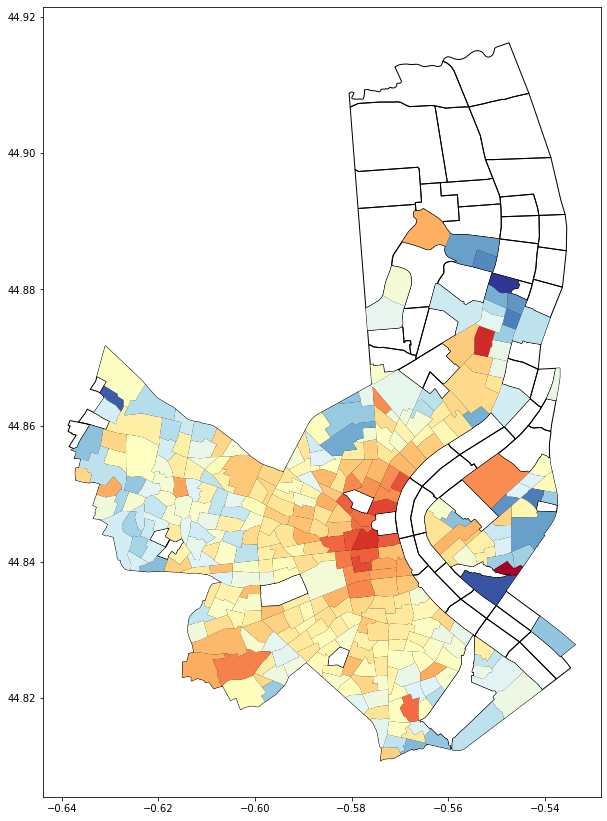

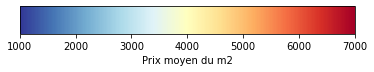

In [24]:
#Affichage d'une heatmap fonction du prix moyen du m2 à Bordeaux sur la période 2015-2019
base = bordeaux_sections.plot(edgecolor = 'black', figsize = (10,20), facecolor = 'none')
bordeaux_sections.merge(valeurs_m2_agg).plot(column='valeur_m2',cmap = 'RdYlBu_r', ax=base)
#Création de la légende
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=1000, vmax=7000)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label="Prix moyen du m2")


In [25]:
valeurs_m2_année = data_json.groupby(['année','section']).valeur_m2.mean().to_frame('moyenne_m2').reset_index() #On regroupe le prix moyen du m2 par année et par section cadastrale

In [26]:
valeurs_m2_année=valeurs_m2_année.pivot(index='section', columns='année', values='moyenne_m2') # Le data frame est modifié pour laisser voir un tableau à double entrée qui donne pour une section cadastrale et et une année données le prix moyen du m2 s'il y a eu de transaction. 
valeurs_m2_année

année,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,2962.500000,2732.558140,NaN,NaN,NaN,NaN
AE,2111.805556,4953.125000,2847.492560,3259.045503,3046.040640,3364.782613
AF,NaN,NaN,NaN,4090.163934,NaN,NaN
AH,1966.065096,2707.282143,2537.752307,2609.208964,2793.807800,3095.026063
AI,1942.984832,3772.300248,2646.604705,3613.251099,2175.461455,3200.000000
...,...,...,...,...,...,...
YR,NaN,NaN,3554.054054,NaN,NaN,NaN
YS,2334.098327,2662.279212,3146.176835,4380.229286,4475.119589,2855.555556
YT,2592.086096,2241.482108,2770.004425,2928.776080,3293.326403,3342.316458


In [27]:
a=valeurs_m2_année.transpose().pct_change().transpose() # Calcul du taux d'évolution du prix moyen du m2 par année et par section cadastrale
a

année,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,NaN,-0.077618,0.000000,0.000000,0.000000,0.000000
AE,NaN,1.345446,-0.425112,0.144532,-0.065358,0.104641
AF,NaN,NaN,NaN,NaN,0.000000,0.000000
AH,NaN,0.377005,-0.062620,0.028157,0.070749,0.107816
AI,NaN,0.941498,-0.298411,0.365240,-0.397921,0.470952
...,...,...,...,...,...,...
YR,NaN,NaN,NaN,0.000000,0.000000,0.000000
YS,NaN,0.140603,0.181761,0.392239,0.021663,-0.361904
YT,NaN,-0.135259,0.235791,0.057318,0.124472,0.014876


In [28]:
b = a.replace(0., np.NaN) #Remplacement des valeurs 0 par NaN pour ne pas influencer le calcul du taux moyen 
b

année,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,NaN,-0.077618,NaN,NaN,NaN,NaN
AE,NaN,1.345446,-0.425112,0.144532,-0.065358,0.104641
AF,NaN,NaN,NaN,NaN,NaN,NaN
AH,NaN,0.377005,-0.062620,0.028157,0.070749,0.107816
AI,NaN,0.941498,-0.298411,0.365240,-0.397921,0.470952
...,...,...,...,...,...,...
YR,NaN,NaN,NaN,NaN,NaN,NaN
YS,NaN,0.140603,0.181761,0.392239,0.021663,-0.361904
YT,NaN,-0.135259,0.235791,0.057318,0.124472,0.014876


In [29]:
taux_moyen=b.mean(axis=1).to_frame('taux_moyen').reset_index() #Calcul du taux du taux moyen d'évolution du prix du m2 par section cadastrale
taux_moyen.sort_values('taux_moyen', ascending=False)

,section,taux_moyen
15,AX,2.233543
121,IE,0.971494
5,AK,0.888858
320,YN,0.528244
95,GL,0.517333
...,...,...
217,OE,NaN
251,PY,NaN
293,TR,NaN
318,YK,NaN


In [30]:
taux_moyen=taux_moyen[taux_moyen['taux_moyen']<0.3] #On enlève les valeurs trop hautes (9 valeurs)
taux_moyen=taux_moyen[taux_moyen['taux_moyen']>-0.2] #On enlève les valeurs trop basses (3 valeurs)
taux_moyen=taux_moyen.fillna(0) # ON remplace les valeurs NaN par 0 si besoin est.
#Ces opérations rendent mieux comptent de l'évolution moyenne pour la majorité des cadastres sur le heatmap suivant

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:561: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


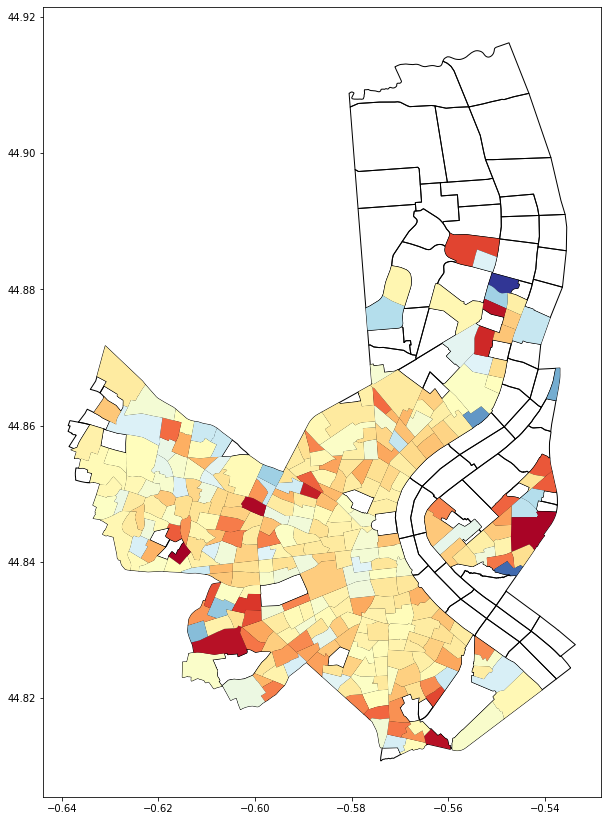

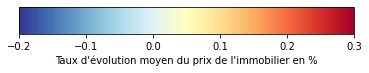

In [31]:
base = bordeaux_sections.plot(edgecolor = 'black', figsize = (10,20), facecolor = 'none') #Fond de carte de cadastre de Bordeaux
a= bordeaux_sections.merge(taux_moyen).plot(column='taux_moyen',colormap = 'RdYlBu_r', ax=base ) #Heatmap de l'évolution des prix du m2
#Création de la légende
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=-0.2, vmax=0.3)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label="Taux d'évolution moyen du prix de l'immobilier en %")

In [50]:
prix_m2_annee = data_json.groupby('année').mean('valeur_m2').reset_index()
prix_m2_annee=prix_m2_annee[['année','valeur_m2']]

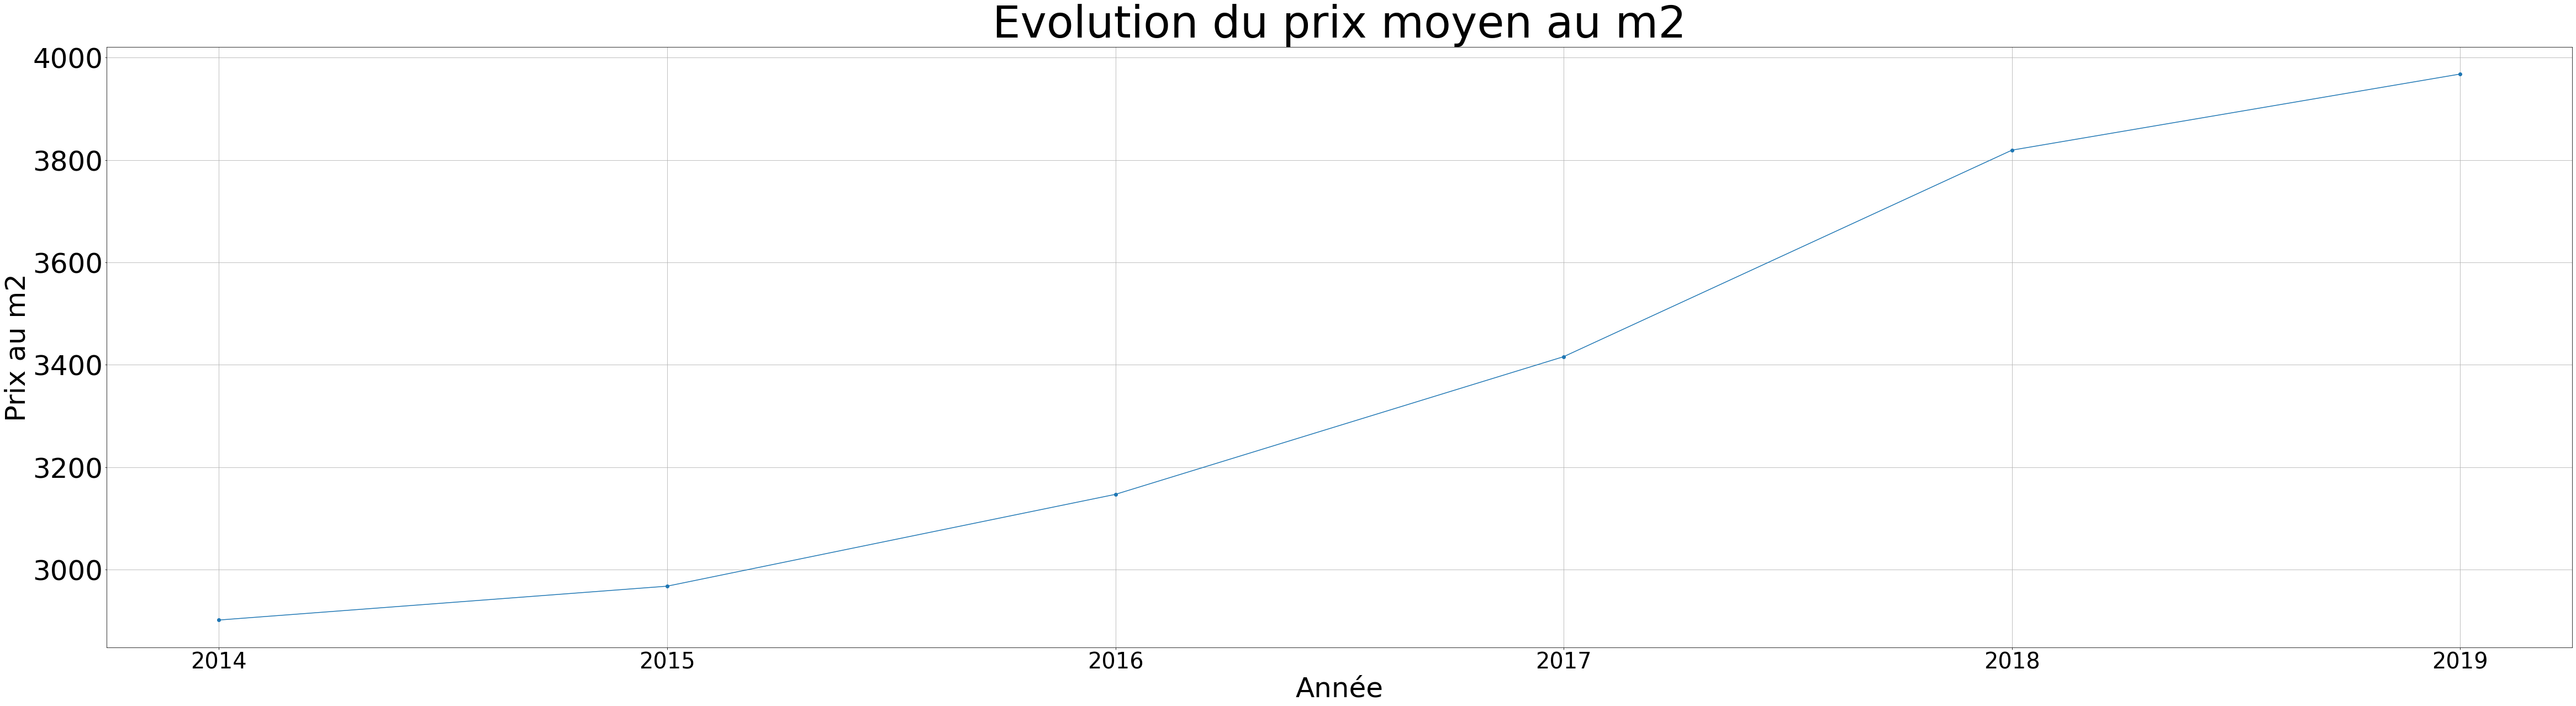

In [53]:
plt.clf
plt.figure(figsize=(80,20))
plt.plot(prix_m2_annee['année'], prix_m2_annee['valeur_m2'],marker='o')

plt.title("Evolution du prix moyen au m2",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Prix au m2', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid()

In [32]:
# data_json["voie"].unique().shape

In [33]:
# Variable distance par rapport à la gare de Bordeaux
from numpy import sin, cos, sqrt, arctan2, radians
data_json["distance_gare"] = (sin((radians(data_json["lat"])-radians(44.821996712))/2)**2 + cos(radians(data_json["lat"]))*cos(radians(44.821996712))*sin((radians(data_json["lon"])-radians(-0.55333112))/2)**2)
data_json["distance_gare"] = 2 * arctan2(sqrt(data_json["distance_gare"]), sqrt(1 - data_json["distance_gare"])) * 6373
data_json[['distance_gare','numero_voie',"voie",'type_voie']].sort_values("distance_gare")

,distance_gare,numero_voie,voie,type_voie
1825,0.129896,10,EUGENE DELACROIX,ALL
1826,0.129896,10,EUGENE DELACROIX,ALL
1827,0.129896,10,EUGENE DELACROIX,ALL
1828,0.129896,10,EUGENE DELACROIX,ALL
1866,0.132080,36,EUGENE DELACROIX,ALL
...,...,...,...,...
29716,NaN,35,JUDE,RUE
29717,NaN,35,JUDE,RUE
29718,NaN,35,JUDE,RUE
30230,NaN,1,DU DOCTEUR BERT CAUD,RUE


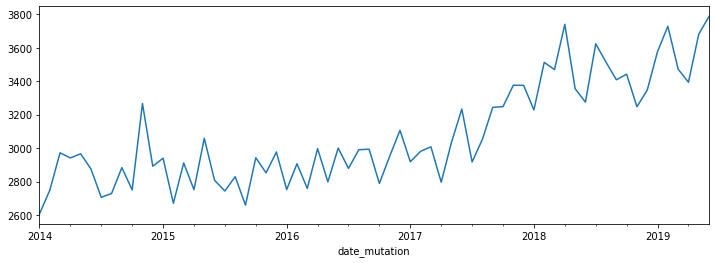

In [34]:
# Données sur un rayon de 2 km
k = 4
data_k = data_json[data_json["distance_gare"]>k][["date_mutation",'valeur_m2']].sort_values("date_mutation")

data_k["date_mutation"] = data_k["date_mutation"].astype('datetime64')

donnee_temporelle = data_k.groupby(data_k['date_mutation'].dt.to_period("M"))['valeur_m2'].mean()
donnee_temporelle.plot(figsize=(12,4))